In [109]:
# --- Manejo de datos ---
import pandas as pd
import numpy as np
import geopandas as gpd

# --- Visualizaci√≥n ---
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import HeatMap
# --- Preprocesamiento ---
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# --- Modelado (Clasificaci√≥n y Clustering) ---
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

# --- Evaluaci√≥n de modelos ---
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# --- Configuraci√≥n general ---
pd.set_option('display.max_columns', None)

# --- Suprimir advertencias ---
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import zscore
from scipy.stats import zscore
import folium

In [110]:
df = pd.read_pickle("data/df_EDA.pkl")

In [111]:
df.info(3)

<class 'pandas.core.frame.DataFrame'>
Index: 8316782 entries, 0 to 8316828
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   case_number           object 
 2   block                 object 
 3   iucr                  object 
 4   primary_type          object 
 5   description           object 
 6   location_description  object 
 7   arrest                int64  
 8   domestic              int64  
 9   beat                  int64  
 10  district              float64
 11  ward                  float64
 12  community_area        float64
 13  fbi_code              object 
 14  x_coordinate          float64
 15  y_coordinate          float64
 16  year                  int64  
 17  latitude              float64
 18  longitude             float64
 19  date_only             object 
 20  time_only             object 
 21  updated_on_only       object 
 22  updated_on_time_only  object 
dtypes: float64(7

# Group by
## Sistema de Clasificaci√≥n IUCR

El Chicago Police Department utiliza el sistema de codificaci√≥n Illinois Uniform Crime Reporting (IUCR), el cual se alinea con las directrices del FBI para el reporte uniforme de cr√≠menes. Este sistema categoriza las infracciones en dos grandes grupos: delitos √≠ndice (Index crimes) y delitos no √≠ndice (Non-Index crimes). 

 üìå *Este an√°lisis fue recomendado y desarrollado en colaboraci√≥n con Baudilio Marquez, quien ha contribuido significativamente a la comprensi√≥n del sistema IUCR en el contexto de nuestro proyecto conjunto.*


a. Delitos √çndice (Index Crimes)

In [112]:
df['primary_type'].value_counts()

primary_type
THEFT                                1763501
BATTERY                              1515233
CRIMINAL DAMAGE                       945912
NARCOTICS                             760775
ASSAULT                               554437
OTHER OFFENSE                         518206
BURGLARY                              440837
MOTOR VEHICLE THEFT                   423066
DECEPTIVE PRACTICE                    381009
ROBBERY                               311846
CRIMINAL TRESPASS                     224346
WEAPONS VIOLATION                     122357
PROSTITUTION                           70317
OFFENSE INVOLVING CHILDREN             59683
PUBLIC PEACE VIOLATION                 54266
SEX OFFENSE                            33598
CRIM SEXUAL ASSAULT                    27323
INTERFERENCE WITH PUBLIC OFFICER       19820
LIQUOR LAW VIOLATION                   15305
GAMBLING                               14657
ARSON                                  14257
HOMICIDE                               137

In [113]:
#creo una lista con los delitos mas graves y mas frecuentes para filtrar el dataframe
index_crimes = {
   "HOMICIDE": "Violento",
    "CRIMINAL SEXUAL ASSAULT": "Violento",
    "ROBBERY": "Violento",
    "AGGRAVATED ASSAULT": "Violento",
    "AGGRAVATED BATTERY": "Violento",
    "BURGLARY": "Contra la propiedad",
    "THEFT": "Contra la propiedad",
    "MOTOR VEHICLE THEFT": "Contra la propiedad",
    "ARSON": "Incendio"
}
df_index=df[df['primary_type'].isin(index_crimes)].copy()

In [114]:
df_index.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2977917 entries, 4 to 8316827
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   case_number           object 
 2   block                 object 
 3   iucr                  object 
 4   primary_type          object 
 5   description           object 
 6   location_description  object 
 7   arrest                int64  
 8   domestic              int64  
 9   beat                  int64  
 10  district              float64
 11  ward                  float64
 12  community_area        float64
 13  fbi_code              object 
 14  x_coordinate          float64
 15  y_coordinate          float64
 16  year                  int64  
 17  latitude              float64
 18  longitude             float64
 19  date_only             object 
 20  time_only             object 
 21  updated_on_only       object 
 22  updated_on_time_only  object 
dtypes: float64(7

In [115]:
df_index.head(5)

id case_number                   block  iucr         primary_type  \
4  13204489    JG416325          0000X E 8TH ST  0810                THEFT   
5  11695116    JC272771  018XX S CALIFORNIA AVE  0620             BURGLARY   
7  12729745    JF279458     035XX N CENTRAL AVE  0340              ROBBERY   
8  12835559    JF406130         004XX E 69TH ST  0910  MOTOR VEHICLE THEFT   
9  13003649    JG177593       070XX S CLYDE AVE  0610             BURGLARY   

                      description                    location_description  \
4                       OVER $500  PARKING LOT / GARAGE (NON RESIDENTIAL)   
5                  UNLAWFUL ENTRY                               RESIDENCE   
7  ATTEMPT STRONG ARM - NO WEAPON                                    BANK   
8                      AUTOMOBILE                         OTHER (SPECIFY)   
9                  FORCIBLE ENTRY             RESIDENCE - PORCH / HALLWAY   

   arrest  domestic  beat  district  ward  community_area fbi_code  \
4       0         0   123       1.0   4.0            32.0       06   
5       0         0  1023      10.0  25.0            29.0       05   
7       1         0  1633      16.0  30.0            15.0       03   
8       1         0   322       3.0   6.0            69.0       07   
9       1         0   331       3.0   5.0            43.0       05   

   x_coordinate  y_coordinate  year   latitude  longitude   date_only  \
4     1176857.0     1896680.0  2023  41.871835 -87.626151  2023-09-06   
5     1157982.0     1890961.0  2019  41.856547 -87.695605  2019-05-21   
7     1138391.0     1923142.0  2022  41.945232 -87.766735  2022-06-14   
8     1180204.0     1859359.0  2022  41.769347 -87.615008  2022-09-21   
9     1191427.0     1858753.0  2023  41.767419 -87.573890  2023-02-22   

  time_only updated_on_only updated_on_time_only  
4  11:00:00      2023-11-04             15:40:18  
5  08:20:00      2024-01-19             15:40:50  
7  14:47:00      2024-01-19             15:40:50  
8  22:00:00      2024-01-19             15:40:50  
9  13:50:00      2024-01-19             15:40:50

In [116]:
df_index.describe()

id        arrest      domestic          beat      district  \
count  2.977917e+06  2.977917e+06  2.977917e+06  2.977917e+06  2.977917e+06   
mean   7.531789e+06  9.644762e-02  2.785000e-02  1.225664e+03  1.167372e+01   
std    3.759945e+06  2.952042e-01  1.645430e-01  7.197445e+02  7.130026e+00   
min    6.340000e+02  0.000000e+00  0.000000e+00  1.110000e+02  1.000000e+00   
25%    4.122996e+06  0.000000e+00  0.000000e+00  6.230000e+02  6.000000e+00   
50%    7.647837e+06  0.000000e+00  0.000000e+00  1.132000e+03  1.100000e+01   
75%    1.087291e+07  0.000000e+00  0.000000e+00  1.824000e+03  1.800000e+01   
max    1.383938e+07  1.000000e+00  1.000000e+00  2.535000e+03  3.100000e+01   

               ward  community_area  x_coordinate  y_coordinate          year  \
count  2.977917e+06    2.977917e+06  2.977917e+06  2.977917e+06  2.977917e+06   
mean   2.409655e+01    3.472932e+01  1.165110e+06  1.888865e+06  2.011050e+03   
std    1.408930e+01    2.125376e+01  1.672714e+04  3.262002e+04  6.991082e+00   
min    1.000000e+00    0.000000e+00  0.000000e+00  0.000000e+00  2.001000e+03   
25%    1.100000e+01    2.200000e+01  1.154765e+06  1.861276e+06  2.005000e+03   
50%    2.600000e+01    2.800000e+01  1.166601e+06  1.896142e+06  2.010000e+03   
75%    3.500000e+01    5.000000e+01  1.176338e+06  1.912459e+06  2.017000e+03   
max    5.000000e+01    7.700000e+01  1.205119e+06  1.951622e+06  2.025000e+03   

           latitude     longitude  
count  2.977917e+06  2.977917e+06  
mean   4.185063e+01 -8.766953e+01  
std    8.974492e-02  6.052591e-02  
min    3.661945e+01 -9.168657e+01  
25%    4.177497e+01 -8.770723e+01  
50%    4.187082e+01 -8.766404e+01  
75%    4.191559e+01 -8.762834e+01  
max    4.202291e+01 -8.752453e+01

Porcentaje de arrestos para cada tipo de delito INDEX_CRIMES


In [117]:
df_index.groupby("primary_type")["arrest"].mean().sort_values(ascending=False)

primary_type
HOMICIDE                   0.478672
ARSON                      0.122887
THEFT                      0.108694
ROBBERY                    0.092453
MOTOR VEHICLE THEFT        0.076485
CRIMINAL SEXUAL ASSAULT    0.073340
BURGLARY                   0.057214
Name: arrest, dtype: float64

In [118]:
#he generado una nueva columna 'arrest_mean' que contiene el pormedio de arrestos por los delitos mas graves
df_index['arrest_mean']=df_index['arrest'].mean()

In [119]:
arrest_rate = df_index['arrest'].mean()
print(arrest_rate)

0.09644761757967062


## An√°lisis espacial

Lugar mas frecuente por tipo de delito

In [120]:
#con esta instruccion quiero hacer un analiss espacial de los delitos mas graves y frecuentes
df_index.groupby("primary_type")["location_description"].agg(lambda x: x.mode().iloc[0])

primary_type
ARSON                      VEHICLE NON-COMMERCIAL
BURGLARY                                RESIDENCE
CRIMINAL SEXUAL ASSAULT                 APARTMENT
HOMICIDE                                   STREET
MOTOR VEHICLE THEFT                        STREET
ROBBERY                                    STREET
THEFT                                      STREET
Name: location_description, dtype: object

Moda de location_description por tipo de delito

In [121]:
moda_localizacion = df_index.groupby("primary_type")["location_description"]\
    .agg(lambda x: x.mode().iloc[0]).reset_index(name="location_mode")

Calculo de coordenadas medias para cada tipo de delito y lugar
con esto quiero ver el lugar promedio de cada uno de los eventos 

In [122]:
coordenadas = df_index.groupby(["primary_type", "location_description"])[["latitude", "longitude"]]\
    .mean().reset_index()

# Uno para quedarnos solo con la moda y su ubicaci√≥n media
df_mapa = moda_localizacion.merge(coordenadas,
                                   left_on=["primary_type", "location_mode"],
                                   right_on=["primary_type", "location_description"])

In [123]:
# Centro del mapa (Chicago)
map_center = [41.88, -87.63]
m = folium.Map(location=map_center, zoom_start=11)

# Dibujo cada moda de localizaci√≥n como un punto rojo
for _, row in df_mapa.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=5,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.8,
        popup=f"{row['primary_type']}: {row['location_mode']}"
    ).add_to(m)

m

In [124]:
df_index[['latitude','longitude']].describe()

latitude     longitude
count  2.977917e+06  2.977917e+06
mean   4.185063e+01 -8.766953e+01
std    8.974492e-02  6.052591e-02
min    3.661945e+01 -9.168657e+01
25%    4.177497e+01 -8.770723e+01
50%    4.187082e+01 -8.766404e+01
75%    4.191559e+01 -8.762834e+01
max    4.202291e+01 -8.752453e+01

In [125]:
#El valor m√≠nimo de latitud ( min = 36.61) y longitud ( min = -91.68)
#  est√°n muy lejos de Chicago (probablemente errores de geocodificaci√≥n o datos mal cargados
# Filtro solo los datos dentro del rango esperado para Chicago
df_chicago = df_index[
    (df_index['latitude'] >= 41.6) & (df_index['latitude'] <= 42.1) &
    (df_index['longitude'] >= -88) & (df_index['longitude'] <= -87.3)
]

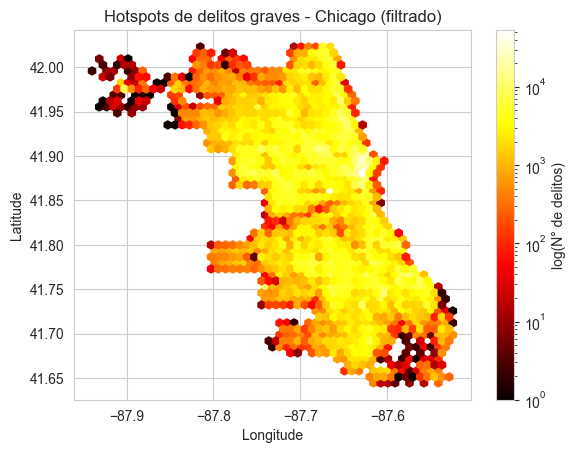

In [126]:
plt.hexbin(df_chicago['longitude'], df_chicago['latitude'], gridsize=50, cmap='hot', bins='log')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hotspots de delitos graves - Chicago (filtrado)')
plt.colorbar(label='log(N¬∞ de delitos)')
plt.show()

Lugares donde ocurren mas delitos

In [127]:
#con esta instruccion filtro los 10 lugares mas comunes donde ocurren los delitros graves
top_locations = df_index["location_description"].value_counts().head(10).index
#ahora quiero filtrar el dataframe para quedarme solo con los delitos que ocurren en sos lugares
df_top_loc = df_index[df_index["location_description"].isin(top_locations)]

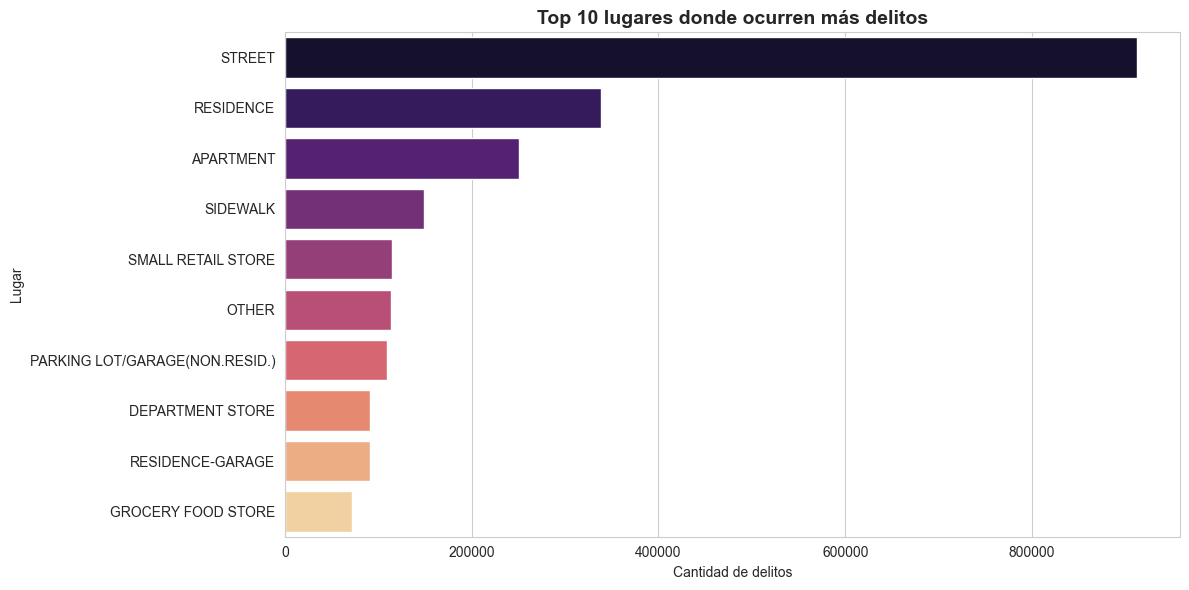

In [128]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_top_loc,
    y="location_description",
    order=top_locations,
    palette="magma"
)

plt.title("Top 10 lugares donde ocurren m√°s delitos", fontsize=14, fontweight="bold")
plt.xlabel("Cantidad de delitos")
plt.ylabel("Lugar")
plt.tight_layout()
plt.show()


Resumen estad√≠stico general de arrestos y ubicaciones

In [129]:
df_index[["arrest", "latitude", "longitude"]].describe()

arrest      latitude     longitude
count  2.977917e+06  2.977917e+06  2.977917e+06
mean   9.644762e-02  4.185063e+01 -8.766953e+01
std    2.952042e-01  8.974492e-02  6.052591e-02
min    0.000000e+00  3.661945e+01 -9.168657e+01
25%    0.000000e+00  4.177497e+01 -8.770723e+01
50%    0.000000e+00  4.187082e+01 -8.766404e+01
75%    0.000000e+00  4.191559e+01 -8.762834e+01
max    1.000000e+00  4.202291e+01 -8.752453e+01

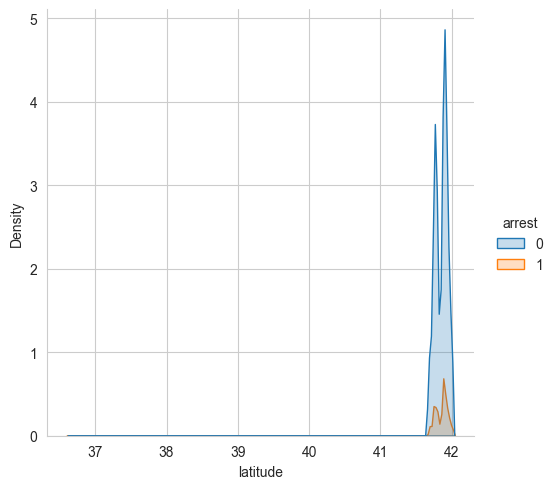

In [130]:
#con esta instruccion quiero obervar la distribucion de delitos segun la laititus y los arrestos
sns.displot(df_index, x="latitude", hue="arrest", kind="kde", fill=True)

Calles con mas delitos

In [131]:
df_index['block'].value_counts().head(10)

block
001XX N STATE ST        11945
076XX S CICERO AVE       8551
0000X N STATE ST         8507
008XX N MICHIGAN AVE     7406
100XX W OHARE ST         6809
0000X S STATE ST         3372
006XX N MICHIGAN AVE     3295
001XX W 87TH ST          3280
046XX W NORTH AVE        3129
026XX N ELSTON AVE       3018
Name: count, dtype: int64

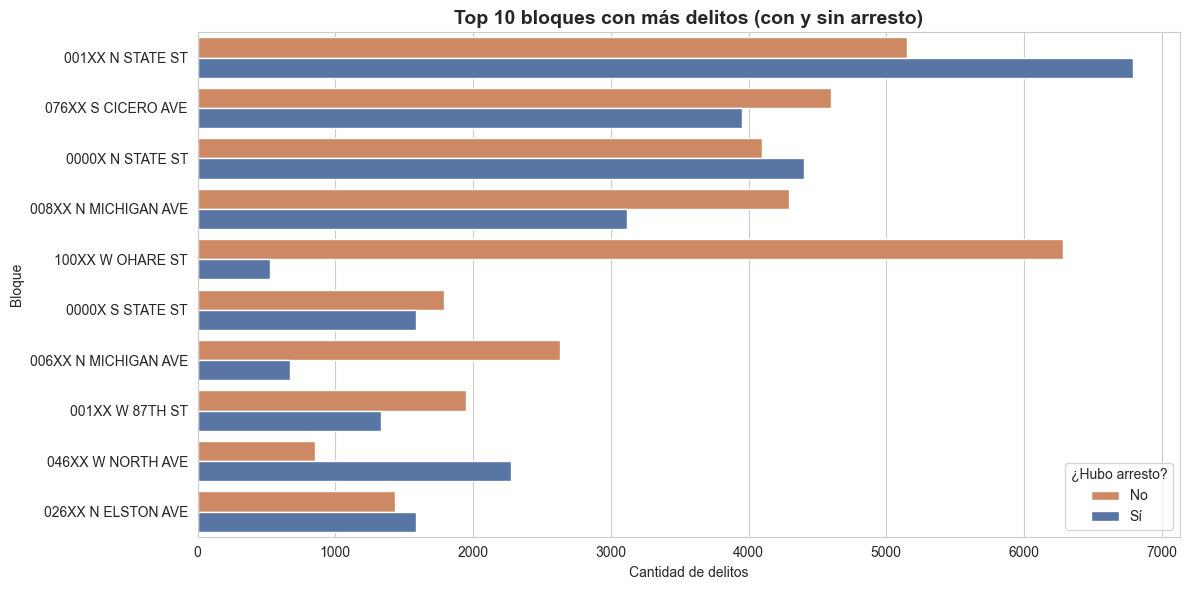

In [132]:
top_blocks = df_index["block"].value_counts().head(10).index
df_top = df_index[df_index["block"].isin(top_blocks)]

custom_palette = {True: "#4C72B0", False: "#DD8452"} # Azul y rojo fuertes

# Gr√°fico
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_top,
    y="block",
    hue="arrest",
    order=top_blocks,
    palette=custom_palette
)

plt.title("Top 10 bloques con m√°s delitos (con y sin arresto)", fontsize=14, fontweight="bold")
plt.xlabel("Cantidad de delitos")
plt.ylabel("Bloque")
plt.legend(title="¬øHubo arresto?", labels=["No", "S√≠"])
plt.tight_layout()
plt.show()

Conteo de delito por tipo principal

In [133]:

df_index.groupby('primary_type')[['block']].count()


block
primary_type                    
ARSON                      14257
BURGLARY                  440837
CRIMINAL SEXUAL ASSAULT    10649
HOMICIDE                   13761
MOTOR VEHICLE THEFT       423066
ROBBERY                   311846
THEFT                    1763501

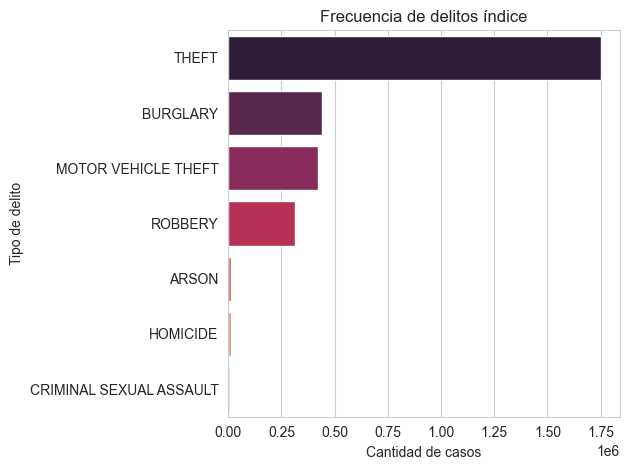

In [134]:
# Datos agrupados
counts = {
    'ARSON': 14256,
    'BURGLARY': 440772,
    'CRIMINAL SEXUAL ASSAULT': 10631,
    'HOMICIDE': 13724,
    'MOTOR VEHICLE THEFT': 421767,
    'ROBBERY': 311783,
    'THEFT': 1752953
}

df_counts = pd.DataFrame(list(counts.items()), columns=["primary_type", "count"])
df_counts = df_counts.sort_values("count", ascending=False)
# Barplot
sns.barplot(data=df_counts, x="count", y="primary_type", palette="rocket")
plt.title("Frecuencia de delitos √≠ndice")
plt.xlabel("Cantidad de casos")
plt.ylabel("Tipo de delito")
plt.tight_layout()
plt.show()

In [135]:
df_index.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2977917 entries, 4 to 8316827
Data columns (total 24 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   case_number           object 
 2   block                 object 
 3   iucr                  object 
 4   primary_type          object 
 5   description           object 
 6   location_description  object 
 7   arrest                int64  
 8   domestic              int64  
 9   beat                  int64  
 10  district              float64
 11  ward                  float64
 12  community_area        float64
 13  fbi_code              object 
 14  x_coordinate          float64
 15  y_coordinate          float64
 16  year                  int64  
 17  latitude              float64
 18  longitude             float64
 19  date_only             object 
 20  time_only             object 
 21  updated_on_only       object 
 22  updated_on_time_only  object 
 23  arrest_mean 

## Analisis temporal

1. Delitos por a√±o 

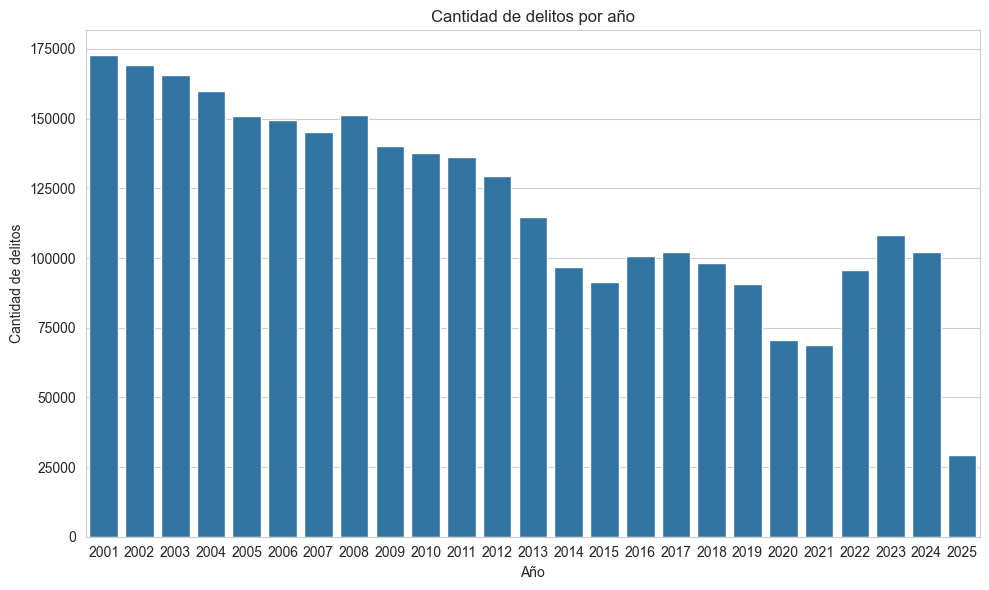

In [136]:
delitosIndex_por_a√±o=df_index['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=delitosIndex_por_a√±o.index, y=delitosIndex_por_a√±o.values)
plt.title("Cantidad de delitos por a√±o")
plt.xlabel("A√±o")     
plt.ylabel("Cantidad de delitos")
plt.tight_layout()
plt.show()

2. Delitos por mes (tendencia estacional)
Ahora veremos como varian los delitos por mes

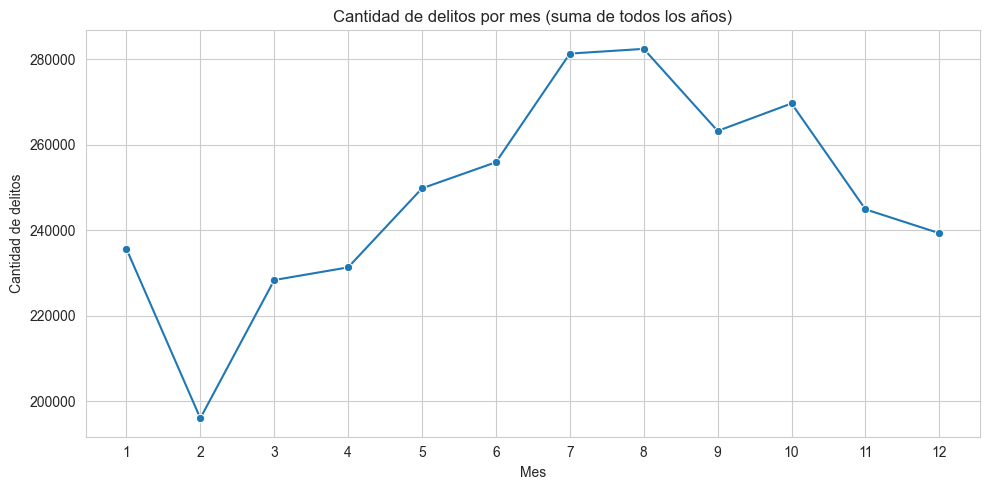

In [137]:
# columna 'date_only' en formato datetime
df_index['date_only'] = pd.to_datetime(df_index['date_only'], errors='coerce')

# Extraigo el mes
df_index['month'] = df_index['date_only'].dt.month

# Agrupo por mes los datos
delitosIndex_por_mes = df_index['month'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.lineplot(x=delitosIndex_por_mes.index, y=delitosIndex_por_mes.values, marker='o')
plt.title('Cantidad de delitos por mes (suma de todos los a√±os)')
plt.xlabel('Mes')
plt.ylabel('Cantidad de delitos')
plt.xticks(range(1,13))
plt.tight_layout()
plt.show()

3. Delitos por d√≠a de la semana


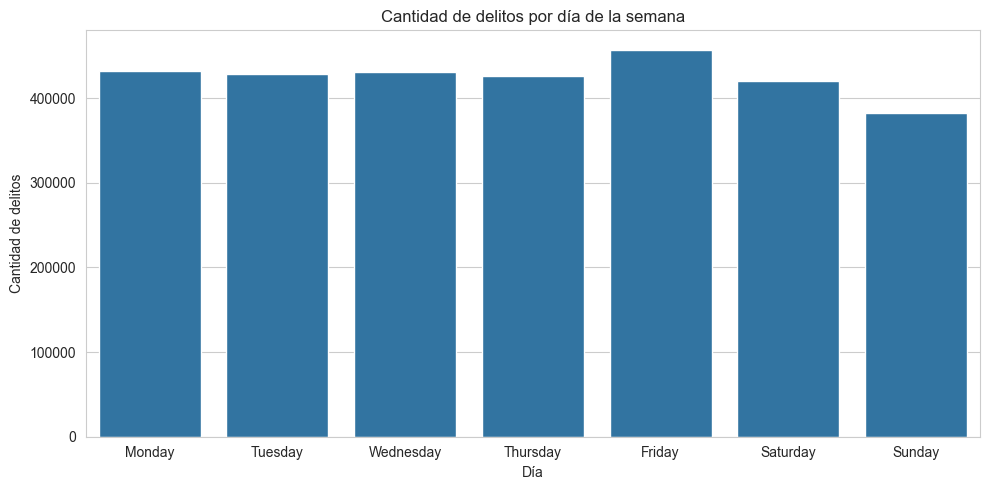

In [138]:
df_index['day_of_week'] = pd.to_datetime(df_index['date_only']).dt.day_name()

# Orden l√≥gico de los d√≠as
dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

delitos_por_dia = df_index['day_of_week'].value_counts().reindex(dias_orden)

plt.figure(figsize=(10,5))
sns.barplot(x=delitos_por_dia.index, y=delitos_por_dia.values)
plt.title('Cantidad de delitos por d√≠a de la semana')
plt.xlabel('D√≠a')
plt.ylabel('Cantidad de delitos')
plt.tight_layout()
plt.show()

4.Frecuencia de delito por hora (extraigo otro formato numerico)
Esto me permite detectar las horas pico

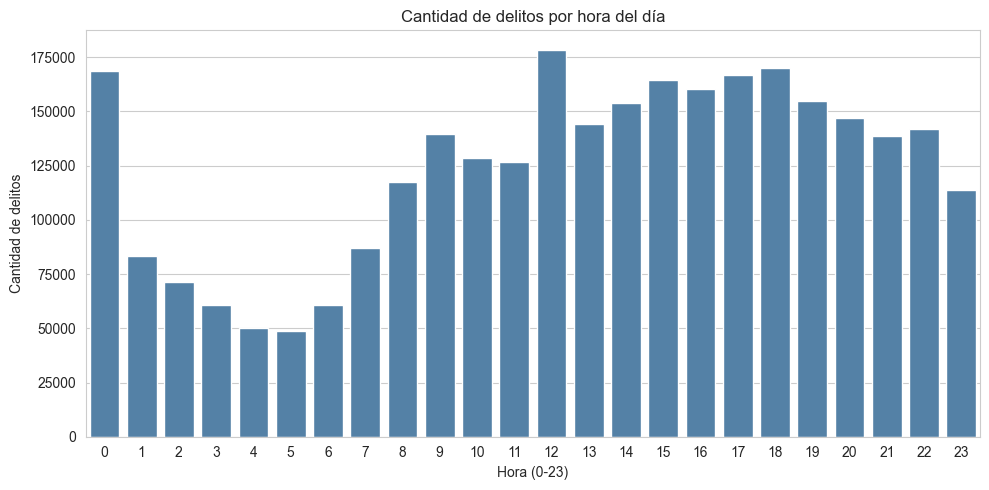

In [139]:
# Extraer la hora de la columna 'time_only' si no existe la columna 'hour'
if 'hour' not in df_index.columns:
	df_index['hour'] = pd.to_datetime(df_index['time_only'], errors='coerce').dt.hour

delitos_por_hora = df_index['hour'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.barplot(x=delitos_por_hora.index, y=delitos_por_hora.values, color='steelblue')
plt.title('Cantidad de delitos por hora del d√≠a')
plt.xlabel('Hora (0-23)')
plt.ylabel('Cantidad de delitos')
plt.tight_layout()
plt.show()

Detectar patrones nocturnos vs. diurnos

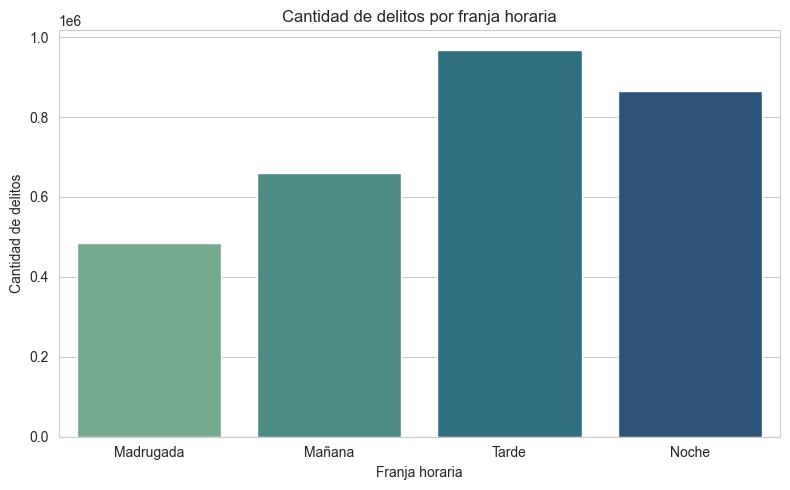

In [140]:
# Defino franjas horarias
def categoria_franga_horaria(hora):
    if 6 <= hora < 12:
        return 'Ma√±ana'
    elif 12 <= hora < 18:
        return 'Tarde'
    elif 18 <= hora < 24:
        return 'Noche'
    else:
        return 'Madrugada'

df_index['franja_horaria'] = df_index['hour'].apply(categoria_franga_horaria)

# Cuento delitos por franja horaria
delitos_por_franja = df_index['franja_horaria'].value_counts().reindex(['Madrugada','Ma√±ana','Tarde','Noche'])

plt.figure(figsize=(8,5))
sns.barplot(x=delitos_por_franja.index, y=delitos_por_franja.values, palette='crest')
plt.title('Cantidad de delitos por franja horaria')
plt.xlabel('Franja horaria')
plt.ylabel('Cantidad de delitos')
plt.tight_layout()
plt.show()

In [141]:
df_index.head(5)

id case_number                   block  iucr         primary_type  \
4  13204489    JG416325          0000X E 8TH ST  0810                THEFT   
5  11695116    JC272771  018XX S CALIFORNIA AVE  0620             BURGLARY   
7  12729745    JF279458     035XX N CENTRAL AVE  0340              ROBBERY   
8  12835559    JF406130         004XX E 69TH ST  0910  MOTOR VEHICLE THEFT   
9  13003649    JG177593       070XX S CLYDE AVE  0610             BURGLARY   

                      description                    location_description  \
4                       OVER $500  PARKING LOT / GARAGE (NON RESIDENTIAL)   
5                  UNLAWFUL ENTRY                               RESIDENCE   
7  ATTEMPT STRONG ARM - NO WEAPON                                    BANK   
8                      AUTOMOBILE                         OTHER (SPECIFY)   
9                  FORCIBLE ENTRY             RESIDENCE - PORCH / HALLWAY   

   arrest  domestic  beat  district  ward  community_area fbi_code  \
4       0         0   123       1.0   4.0            32.0       06   
5       0         0  1023      10.0  25.0            29.0       05   
7       1         0  1633      16.0  30.0            15.0       03   
8       1         0   322       3.0   6.0            69.0       07   
9       1         0   331       3.0   5.0            43.0       05   

   x_coordinate  y_coordinate  year   latitude  longitude  date_only  \
4     1176857.0     1896680.0  2023  41.871835 -87.626151 2023-09-06   
5     1157982.0     1890961.0  2019  41.856547 -87.695605 2019-05-21   
7     1138391.0     1923142.0  2022  41.945232 -87.766735 2022-06-14   
8     1180204.0     1859359.0  2022  41.769347 -87.615008 2022-09-21   
9     1191427.0     1858753.0  2023  41.767419 -87.573890 2023-02-22   

  time_only updated_on_only updated_on_time_only  arrest_mean  month  \
4  11:00:00      2023-11-04             15:40:18     0.096448      9   
5  08:20:00      2024-01-19             15:40:50     0.096448      5   
7  14:47:00      2024-01-19             15:40:50     0.096448      6   
8  22:00:00      2024-01-19             15:40:50     0.096448      9   
9  13:50:00      2024-01-19             15:40:50     0.096448      2   

  day_of_week  hour franja_horaria  
4   Wednesday    11         Ma√±ana  
5     Tuesday     8         Ma√±ana  
7     Tuesday    14          Tarde  
8   Wednesday    22          Noche  
9   Wednesday    13          Tarde

## Modelo

In [142]:
vars_cluster = ['hour', 'day_of_week', 'primary_type', 'district', 'domestic', 'arrest_mean']

df_cluster = df_index[vars_cluster].copy()
df_cluster.head()

hour day_of_week         primary_type  district  domestic  arrest_mean
4    11   Wednesday                THEFT       1.0         0     0.096448
5     8     Tuesday             BURGLARY      10.0         0     0.096448
7    14     Tuesday              ROBBERY      16.0         0     0.096448
8    22   Wednesday  MOTOR VEHICLE THEFT       3.0         0     0.096448
9    13   Wednesday             BURGLARY       3.0         0     0.096448

In [143]:
df_cluster = pd.get_dummies(df_cluster, drop_first=True)
df_cluster.head()

hour  district  domestic  arrest_mean  day_of_week_Monday  \
4    11       1.0         0     0.096448               False   
5     8      10.0         0     0.096448               False   
7    14      16.0         0     0.096448               False   
8    22       3.0         0     0.096448               False   
9    13       3.0         0     0.096448               False   

   day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
4                 False               False                 False   
5                 False               False                 False   
7                 False               False                 False   
8                 False               False                 False   
9                 False               False                 False   

   day_of_week_Tuesday  day_of_week_Wednesday  primary_type_BURGLARY  \
4                False                   True                  False   
5                 True                  False                   True   
7                 True                  False                  False   
8                False                   True                  False   
9                False                   True                   True   

   primary_type_CRIMINAL SEXUAL ASSAULT  primary_type_HOMICIDE  \
4                                 False                  False   
5                                 False                  False   
7                                 False                  False   
8                                 False                  False   
9                                 False                  False   

   primary_type_MOTOR VEHICLE THEFT  primary_type_ROBBERY  primary_type_THEFT  
4                             False                 False                True  
5                             False                 False               False  
7                             False                  True               False  
8                              True                 False               False  
9                             False                 False               False

Escalar todas las variables num√©ricas

In [144]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

Elecci√≥n del n√∫mero de clusters

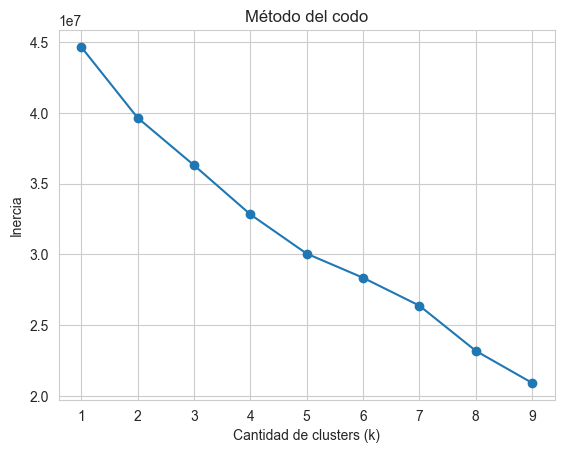

In [145]:
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, '-o')
plt.xlabel('Cantidad de clusters (k)')
plt.ylabel('Inercia')
plt.title('M√©todo del codo')
plt.show()

## Primer cluster

In [146]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_index['cluster'] = kmeans.fit_predict(X_scaled)

In [147]:
# ¬øCu√°ntos incidentes hay en cada cluster?
print(df_index['cluster'].value_counts())

# ¬øC√≥mo se distribuyen por tipo de delito y franja horaria?
pd.crosstab(df_index['cluster'], df_index['primary_type'])

# Por franja horaria:
pd.crosstab(df_index['cluster'], df_index['franja_horaria'])

cluster
3    1777758
1     447476
2     440837
0     311846
Name: count, dtype: int64


franja_horaria  Madrugada  Ma√±ana   Noche   Tarde
cluster                                          
0                   74118   45207  110029   82492
1                   89621   87575  164557  105723
2                   73636  133865  103706  129630
3                  246318  393397  487627  650416

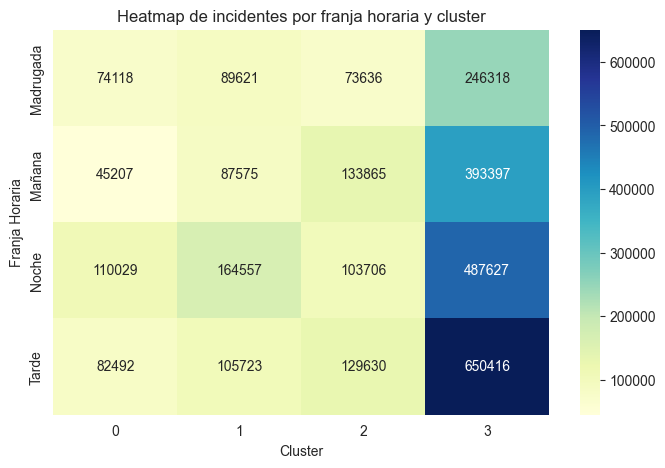

In [148]:
plt.figure(figsize=(8,5))
tabla = pd.crosstab(df_index['franja_horaria'], df_index['cluster'])
sns.heatmap(tabla, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap de incidentes por franja horaria y cluster')
plt.ylabel('Franja Horaria')
plt.xlabel('Cluster')
plt.show()

 **Heatmap de incidentes por franja horaria y cluster**
 
Este gr√°fico de calor muestra la cantidad de incidentes registrados en cada franja horaria (Madrugada, Ma√±ana, Noche, Tarde) para cada cluster identificado por el an√°lisis K-Means.

Cluster 3 concentra la mayor cantidad de incidentes en todas las franjas horarias, especialmente en la tarde (650,416) y la noche (487,627).
Los valores de incidentes son notablemente m√°s altos en este cluster en comparaci√≥n con los dem√°s.

Cluster 2 y Cluster 1 presentan cantidades moderadas de incidentes, siendo la ma√±ana y la tarde sus franjas m√°s relevantes.

Cluster 0 tiene la menor cantidad de incidentes en todas las franjas, aunque destaca un poco m√°s en la noche (110,029).

La intensidad del color en el heatmap permite visualizar r√°pidamente d√≥nde se concentran los incidentes, siendo el azul m√°s oscuro indicador de mayor cantidad.

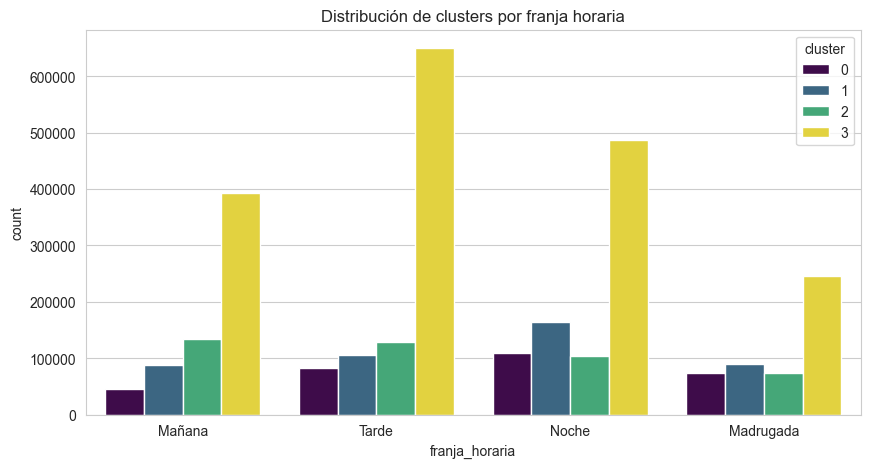

In [149]:
plt.figure(figsize=(10,5)) 
sns.countplot(data=df_index, x='franja_horaria', hue='cluster',palette='viridis')
plt.title('Distribuci√≥n de clusters por franja horaria') 
plt.show() 

**Distribuci√≥n de clusters por franja horaria**

Este gr√°fico de barras muestra la distribuci√≥n de incidentes agrupados por cluster y franja horaria:

Se observa que Cluster 3 (color amarillo) es el m√°s numeroso en todas las franjas horarias, con un pico especialmente alto en la tarde y la noche.

Los clusters 1 y 2 tienen una distribuci√≥n m√°s equilibrada entre ma√±ana, tarde y noche, pero nunca superan la cantidad de incidentes de Cluster 3.

Cluster 0 (color violeta oscuro) es consistentemente el menos numeroso en todas las franjas horarias.

El gr√°fico facilita comparar r√°pidamente la frecuencia de incidentes entre franjas y clusters, mostrando que la tarde y la noche son los horarios donde se concentra la mayor√≠a de los delitos, especialmente en Cluster 3.

**Tabla de contingencia**

muestra la cantidad de incidentes para cada combinaci√≥n de cluster y tipo de delito.

In [150]:
pd.crosstab(df_index['cluster'], df_index['primary_type'])

primary_type  ARSON  BURGLARY  CRIMINAL SEXUAL ASSAULT  HOMICIDE  \
cluster                                                            
0                 0         0                        0         0   
1                 0         0                    10649     13761   
2                 0    440837                        0         0   
3             14257         0                        0         0   

primary_type  MOTOR VEHICLE THEFT  ROBBERY    THEFT  
cluster                                              
0                               0   311846        0  
1                          423066        0        0  
2                               0        0        0  
3                               0        0  1763501

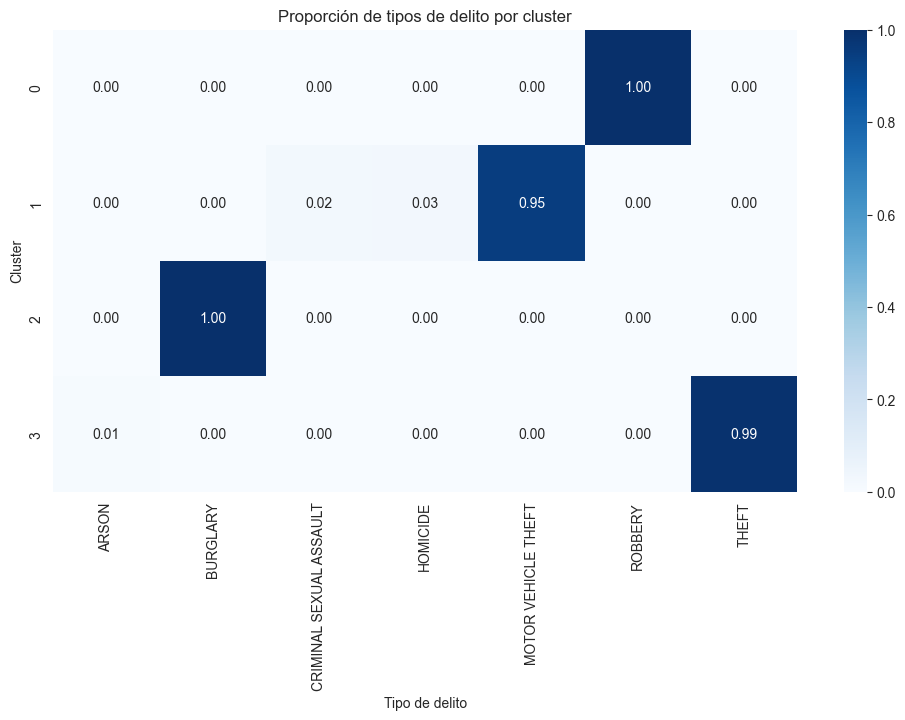

In [151]:
tabla = pd.crosstab(df_index['cluster'], df_index['primary_type'], normalize='index')
plt.figure(figsize=(12,6))
sns.heatmap(tabla, annot=True, fmt=".2f", cmap='Blues')
plt.title('Proporci√≥n de tipos de delito por cluster')
plt.ylabel('Cluster')
plt.xlabel('Tipo de delito')
plt.show()

## Interpretaci√≥n del an√°lisis de clusters seg√∫n tipo de delito

Cluster 0: Agrupa solo robos en la v√≠a p√∫blica (ROBBERY).

Cluster 1: Agrupa principalmente robos de veh√≠culos (MOTOR VEHICLE THEFT), y tambi√©n algunos casos de asalto sexual y homicidio.

Cluster 2: Es exclusivo de robos a viviendas o locales (BURGLARY).

Cluster 3: Agrupa casi todos los robos generales (THEFT), con unos pocos incendios (ARSON).

Cada cluster agrupa un tipo de delito diferente. Esto ayuda a entender qu√© delitos son m√°s frecuentes y c√≥mo se relacionan entre s√≠.

 ## Agrupaci√≥n por modus operandi

In [152]:
# 1. Variables para el clustering (puedo ajustar a las columnas reales)

if 'hour' not in df.columns:
	df['hour'] = pd.to_datetime(df['time_only'], errors='coerce').dt.hour
if 'day_of_week' not in df.columns:
	df['day_of_week'] = pd.to_datetime(df['date_only'], errors='coerce').dt.day_name()


vars_mo = ['primary_type', 'location_description', 'hour', 'day_of_week', 'domestic']

# 2. Tomo una muestra aleatoria (esto es solo para acelerar el c√≥mputo)
n_samples = min(100000, df.shape[0])
rng = np.random.default_rng()
sample_idx = rng.choice(df.dropna(subset=vars_mo).index, size=n_samples, replace=False)
df_sample = df.loc[sample_idx, vars_mo].dropna()

# 3. Codificaci√≥n one-hot (dummy variables)
df_mo_sample = pd.get_dummies(df_sample, drop_first=True, sparse=True)

# 4. Escalado
scaler = StandardScaler(with_mean=False)
X_mo_sample = scaler.fit_transform(df_mo_sample)

# 5. Clustering KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_mo_sample)

# 6. Guardo el cluster en el DataFrame original
df.loc[df_sample.index, 'mo_cluster'] = labels

In [153]:
# 7. Tabla: proporci√≥n de cada delito dentro de cada cluster
tabla = pd.crosstab(df['mo_cluster'], df['primary_type'], normalize='index')
print(tabla.round(2))  # Muestra solo dos decimales, m√°s legible

# 8. Delito m√°s frecuente por cluster y proporci√≥n
delito_predominante = tabla.idxmax(axis=1)
proporcion_predominante = tabla.max(axis=1)
resultado = pd.DataFrame({
    "Delito predominante": delito_predominante,
    "Proporci√≥n": proporcion_predominante.round(2)
})
print(resultado)

primary_type  ARSON  ASSAULT  BATTERY  BURGLARY  \
mo_cluster                                        
0.0             0.0     0.06     0.18      0.01   
1.0             0.0     0.09     0.57      0.10   
2.0             0.0     0.15     0.19      0.19   
3.0             0.0     0.06     0.00      0.03   

primary_type  CONCEALED CARRY LICENSE VIOLATION  CRIM SEXUAL ASSAULT  \
mo_cluster                                                             
0.0                                         0.0                 0.00   
1.0                                         0.0                 0.01   
2.0                                         0.0                 0.00   
3.0                                         0.0                 0.00   

primary_type  CRIMINAL DAMAGE  CRIMINAL SEXUAL ASSAULT  CRIMINAL TRESPASS  \
mo_cluster                                                                  
0.0                      0.04                      0.0               0.27   
1.0                      0.02

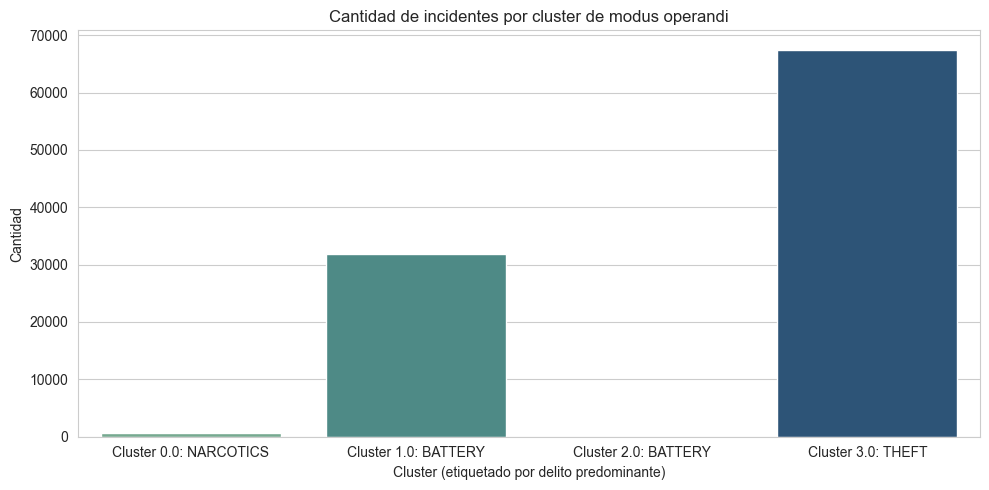

In [154]:
# 9. Gr√°fico: cantidad de incidentes por cluster
sns.set_style("whitegrid")
counts = df['mo_cluster'].value_counts().sort_index()
labels = [f"Cluster {i}: {resultado.loc[i, 'Delito predominante']}" for i in counts.index]

palette = sns.color_palette("crest", len(counts))
plt.figure(figsize=(10, 5))
sns.barplot(x=labels, y=counts.values, palette=palette)
plt.title("Cantidad de incidentes por cluster de modus operandi")
plt.xlabel("Cluster (etiquetado por delito predominante)")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

## Interpretaci√≥n del gr√°fico: cantidad de incidentes por cluster de modus operandi

Cluster 0: NARCOTICS (drogas): Es el menos numeroso, con una cantidad muy baja de incidentes.

Cluster 1: BATTERY (agresiones f√≠sicas): Tiene una cantidad de incidentes moderada, alrededor de 32,000.

Cluster 2: BATTERY: No tiene barras visibles, lo que indica que la cantidad es muy baja o nula.

Cluster 3: THEFT (robos): Es el cluster m√°s numeroso, con cerca de 67,000 incidentes.
Conclusi√≥n:

El delito m√°s com√∫n en los datos analizados es el robo (THEFT), seguido por las agresiones (BATTERY). Los incidentes relacionados con drogas (NARCOTICS) son los menos frecuentes entre los clusters analizados..

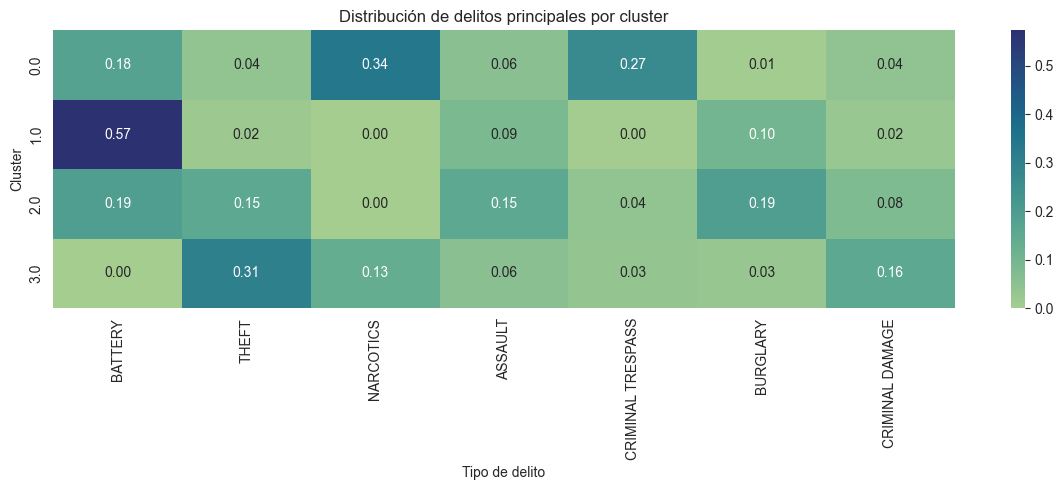

In [155]:
# 10. (Opcional) Heatmap de tipos de delito por cluster, solo los delitos principales (top 7)
top_delitos = tabla.sum().sort_values(ascending=False).head(7).index
tabla_top = tabla[top_delitos]

plt.figure(figsize=(12, 5))
sns.heatmap(tabla_top, annot=True, fmt=".2f", cmap="crest")
plt.title("Distribuci√≥n de delitos principales por cluster")
plt.xlabel("Tipo de delito")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

**An√°lisis de mapa de calor**

_Cl√∫ster 0.0 delitos m√°s comunes: Es un grupo variado, aunque destacan los robos y fraudes.

ROBO: 22%
PR√ÅCTICA ENGA√ëOSA: 22%
BATER√çA (VIOLENCIA F√çSICA): 11%
NARC√ìTICOS: 9%
_Cl√∫ster 1.0 delitos m√°s comunes: Predominan los robos y los da√±os a la propiedad.

ROBO: 31%
BATER√çA: 11%
DA√ëOS PENALES: 12%
_Cl√∫ster 3.0 delitos m√°s comunes: Principalmente agresiones y delitos relacionados con drogas.

BATER√çA: 38%
NARC√ìTICOS: 25%
OTROS DELITOS: 13%
_Cl√∫ster 4.0 delitos m√°s comunes: Agresiones y delitos de drogas son los m√°s frecuentes.

BATER√çA: 27%
NARC√ìTICOS: 20%
OTROS DELITOS: 10%

*Conclusiones*

ROBO es el delito m√°s com√∫n en los cl√∫sters 0 y 1, pero no es mayor√≠a absoluta en ning√∫n grupo.
BATER√çA (agresiones) es el principal delito en los cl√∫sters 3 y 4, seguido por NARC√ìTICOS.
Todos los cl√∫sters tienen una mezcla de delitos, no hay grupos ‚Äúpuros‚Äù de un solo delito.




## Agrupaci√≥n por contexto socio-espacial
Incluye √°rea comunitaria, tipo de delito, hora y si fue dom√©stico.


In [158]:
# Coordenadas promedio por cluster
print("\nCoordenadas promedio por cluster socio-espacial:")
print(df.groupby('socio_cluster')[['latitude', 'longitude']].mean())


Coordenadas promedio por cluster socio-espacial:
                latitude  longitude
socio_cluster                      
0              41.840850 -87.682348
1              41.848652 -87.670063
2              41.838965 -87.672844
3              41.830954 -87.669119


In [156]:
vars_socio = ['community_area', 'primary_type', 'hour', 'domestic']
df_socio = pd.get_dummies(df[vars_socio].dropna(), drop_first=True)

scaler = StandardScaler()
X_socio = scaler.fit_transform(df_socio)

kmeans_socio = KMeans(n_clusters=4, random_state=42, n_init=10)
df['socio_cluster'] = kmeans_socio.fit_predict(X_socio)

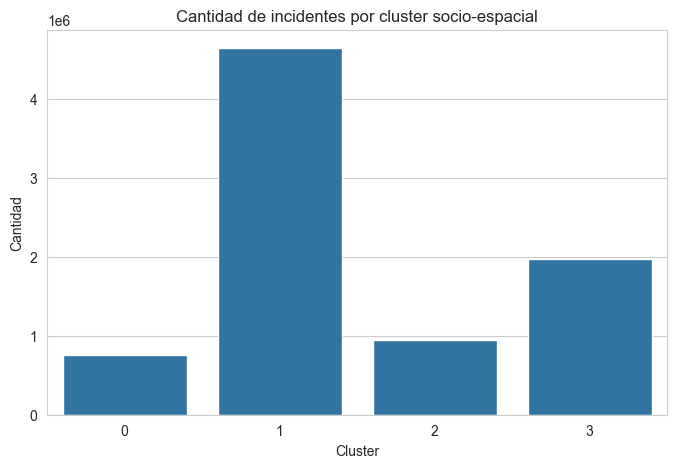

Estad√≠sticas b√°sicas por cluster socio-espacial:
               community_area       hour  domestic
socio_cluster                                     
0                   36.366892  15.082118  0.000808
1                   35.284289  12.938159  0.017820
2                   37.587725  12.748125  0.114894
3                   38.823751  12.808371  0.630706

Top tipos de delito por cluster:

Cluster 0:
primary_type
NARCOTICS    1.0
Name: proportion, dtype: float64

Cluster 1:
primary_type
THEFT                  0.379957
BURGLARY               0.094667
MOTOR VEHICLE THEFT    0.090984
Name: proportion, dtype: float64

Cluster 2:
primary_type
CRIMINAL DAMAGE    1.0
Name: proportion, dtype: float64

Cluster 3:
primary_type
BATTERY          0.769634
OTHER OFFENSE    0.097613
ASSAULT          0.082507
Name: proportion, dtype: float64


In [157]:
# Visualizaci√≥n b√°sica: cantidad de incidentes por cluster
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='socio_cluster', order=sorted(df['socio_cluster'].dropna().unique()))
plt.title('Cantidad de incidentes por cluster socio-espacial')
plt.xlabel('Cluster')
plt.ylabel('Cantidad')
plt.show()

# Interpretaci√≥n b√°sica: caracter√≠sticas promedio por cluster
print("Estad√≠sticas b√°sicas por cluster socio-espacial:")
print(df.groupby('socio_cluster')[['community_area', 'hour', 'domestic']].mean())

print("\nTop tipos de delito por cluster:")
for cluster, grupo in df.groupby('socio_cluster'):
    print(f"\nCluster {int(cluster)}:")
    print(grupo['primary_type'].value_counts(normalize=True).head(3))

# (Opcional) Si community_area tiene pocos valores √∫nicos, tambi√©n puedes ver su frecuencia:
n_areas = df['community_area'].nunique()
if n_areas < 20:
    print("\nTop √°reas comunitarias por cluster:")
    for cluster, grupo in df.groupby('socio_cluster'):
        print(f"\nCluster {int(cluster)}:")
        print(grupo['community_area'].value_counts(normalize=True).head(3))

In [ ]:
# mapa centrado en tus coordenadas
m = folium.Map(location=[41.84, -87.68], zoom_start=12)

# A√±ade los centros de cada cluster
centros = df.groupby('socio_cluster')[['latitude','longitude']].mean()
for c, row in centros.iterrows():
    folium.Marker(
        [row['latitude'], row['longitude']],
        popup=f"Cluster {c}",
        icon=folium.Icon(color='blue')
    ).add_to(m)

In [162]:
from IPython.display import display

display(m)

## Interpretaci√≥n general

El Cl√∫ster 1 tiene la mayor cantidad de incidentes, con casi 4,6 millones de casos.

El Cl√∫ster 3 es el segundo m√°s numeroso, con casi 2 millones de incidentes.

El Cl√∫ster 2 tiene cerca de 1 mill√≥n de casos.

El Cl√∫ster 0 es el menos numeroso, con menos de 1 mill√≥n de incidentes.

Conclusi√≥n:

La mayor√≠a de los incidentes se concentran en el Cluster 1, lo que indica que este grupo socio-espacial es el m√°s afectado por los delitos en los datos analizados.